In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv("house_data.csv")
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,num
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1


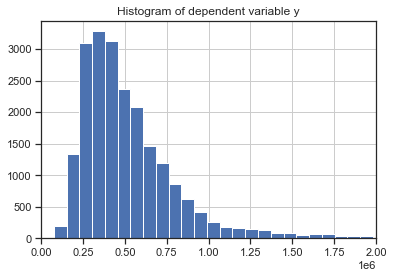

In [44]:
ax = df.price.hist(bins=100)
ax.set_xlim(0, 2000000)
plt.title("Histogram of dependent variable y", fontsize=12)
plt.show()

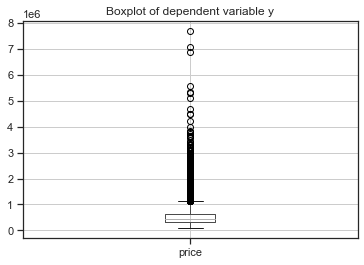

In [10]:
df.boxplot('price')
plt.title("Boxplot of dependent variable y", fontsize=12)
plt.show()

In [11]:
len(df.price > 1000000)

21613

In [12]:
df.price[df.price > 1000000 ].count() / len(df.price)

0.06755193633461343

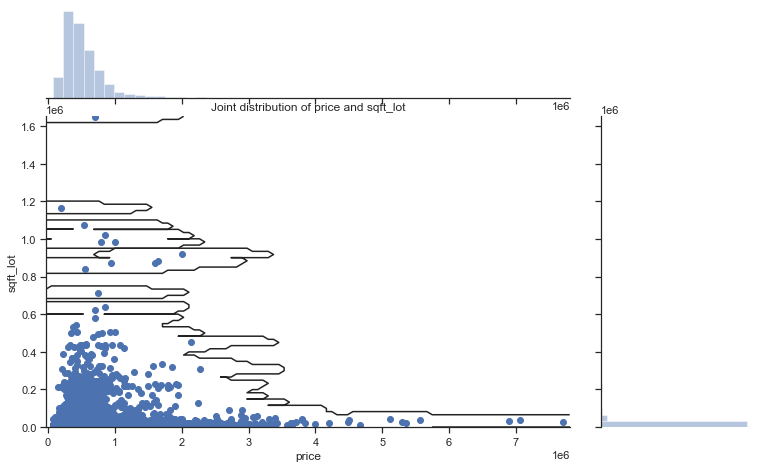

In [13]:
sns.jointplot(df.price, df.sqft_lot, data=df, height=5, 
              ratio=3, color="b").plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.gcf().set_size_inches(12, 7)
plt.title("Joint distribution of price and sqft_lot", fontsize=12)
plt.show()

In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'num'],
      dtype='object')

In [15]:
df.drop(columns=['id', 'date', 'zipcode', 'lat', 'long', 'num'], inplace=True)
from sklearn.linear_model import LinearRegression
y = df.pop('price')
X = df

In [16]:
X.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


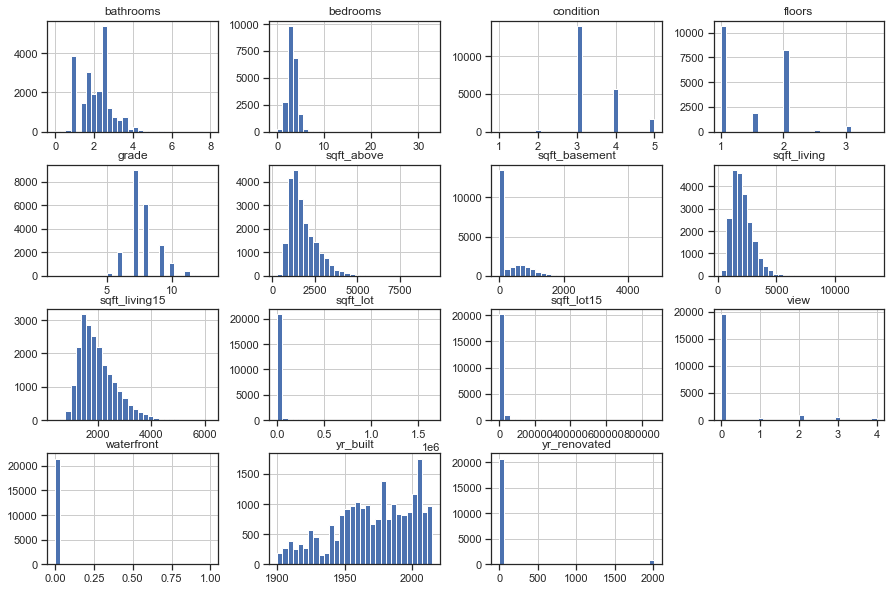

In [17]:
X.hist(bins=30, figsize=(15, 10))
plt.title("Histograms of selected predictor variables", fontsize=12)
plt.show()

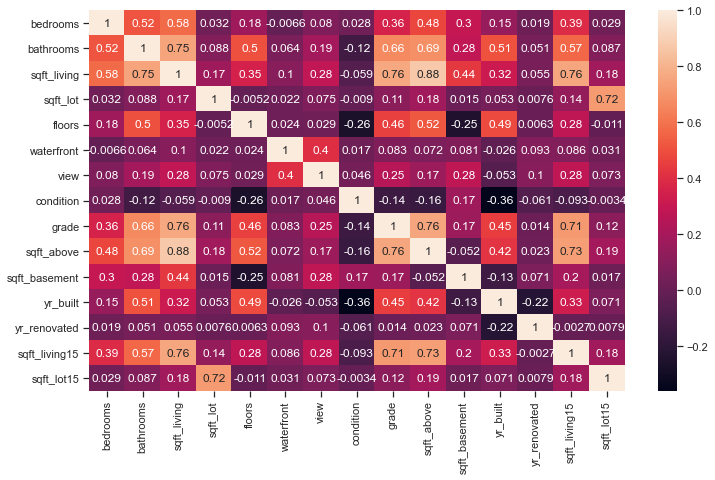

In [18]:
sns.heatmap(X.corr(), annot=True)
plt.gcf().set_size_inches(12, 7)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [20]:
mlr = LinearRegression().fit(X_train, y_train)

In [21]:
mlr.score(X_test, y_test)

0.6628397700771711

In [22]:
from sklearn.linear_model import LogisticRegression
import numpy as np
mil_train = np.where(y_train <= 999999, 0, 1)
clf = LogisticRegression().fit(X_train, mil_train)
mil_test = np.where(y_test <= 999999, 0, 1)
clf.score(X_test, mil_test)

0.9504935225169648

In [23]:
from sklearn.metrics import classification_report
mil_pred = clf.predict(X_test)
print(classification_report(mil_test, mil_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6021
           1       0.76      0.44      0.56       463

    accuracy                           0.95      6484
   macro avg       0.86      0.72      0.77      6484
weighted avg       0.94      0.95      0.94      6484



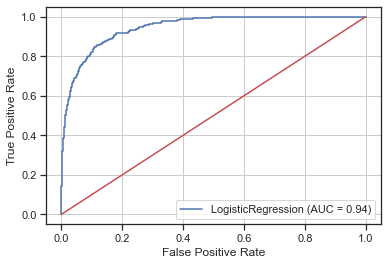

In [24]:
from sklearn.metrics import plot_roc_curve
clf_auc_oos = plot_roc_curve(clf, X_test, mil_test)
plt.grid(True)
plt.plot([0, 1], [0, 1], c='r')
plt.show()

In [25]:
clf.coef_

array([[-9.62388789e-05,  1.01479856e-04,  1.17678664e-03,
        -1.32535761e-06,  5.47227092e-05,  5.25568963e-05,
         6.15165619e-04,  2.57932973e-04,  6.32365070e-04,
         4.79086795e-04,  6.97699845e-04, -4.58318941e-03,
         6.96997532e-04,  7.52712921e-04, -6.39567817e-06]])

Text(0.5, 1.0, 'Feature importances for $1M property classification')

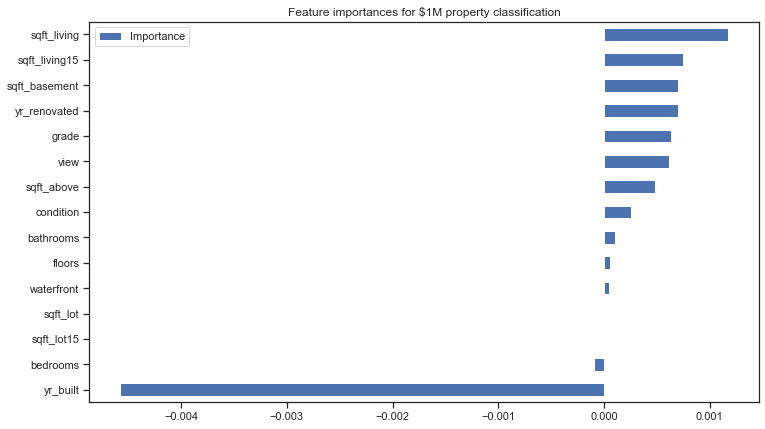

In [26]:
feature_importances = clf.coef_[0]
features_names = df.columns
coef_df = pd.DataFrame(list(zip(features_names, feature_importances)), 
                       columns =['Feature', 'Importance'],
                      index=features_names)
coef_df.set_index('Feature')
coef_df.sort_values(by='Importance', axis=0, ascending=True, inplace=True)
coef_df.plot(kind='barh')
plt.gcf().set_size_inches(12, 7)
plt.title("Feature importances for $1M property classification", fontsize=12)

In [27]:
import plotly.express as px

In [28]:
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [49]:
px.scatter_3d(df, x=df.bedrooms, y=df.bathrooms, z=df.floors, size=df.price, color=df.sqft_living)

In [41]:
import plotly.express as px
df2 = px.data.gapminder()
fig = px.scatter(df2, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

In [42]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
